In [1]:
import os
import matplotlib.pyplot as plt
from ptutils.PytorchLoop import PytorchLoop
import ptutils.analyse_data as ad

#%matplotlib inline

SAVE_EXTENSION = "pdf"

#plt.ioff()
plt.ion()

# Use LaTeX text interpretation in figures
plt.rcParams.update({
    "text.usetex": True})

In [6]:
batch_size = 32
img_shape = (32, 32)
norm_mean = [x / 255.0 for x in [125.3, 123.0, 113.9]]
norm_std = [x / 255.0 for x in [63.0, 62.1, 66.7]]
    
def get_config():

    pytorchtools_path = os.path.expanduser('~/Documents/development/pytorch_classification/pytorchtools')
    script_dir_path = os.path.dirname(os.path.realpath(__vsc_ipynb_file__))

    config = {
        'seed' : 42,
        'num_workers' : 0,
        'pin_memory' : False,
        'no_cuda' : True,
        'cuda_device' : 'cpu',
        'save_data_paths' : False,
    }


    #transformations
    config['transforms'] = {}

    item = {}; config['transforms']['transform_to_tensor'] = item
    item['source'] = os.path.join(script_dir_path, 'TransformToTensor.py')
    item['params'] = {}

    item = {}; config['transforms']['transform_test'] = item
    item['source'] = os.path.join(script_dir_path, 'TransformCIFARTest.py')
    item['params'] = {
        'norm_mean' :  norm_mean, 
        'norm_std' : norm_std,
        }


    #datasets
    config['datasets'] = {}

    item = {}; config['datasets']['dataset_to_tensor'] = item
    item['source'] = os.path.join(script_dir_path, 'CIFAR10.py')
    item['params'] = {
        'transform' : 'transform_to_tensor',
        'root' : '/scratch',
        'download' : True,
        'b_train' : True,
    }

    item = {}; config['datasets']['dataset_train'] = item
    item['source'] = os.path.join(script_dir_path, 'CIFAR10.py')
    item['params'] = {
        'transform' : 'transform_test',
        'root' : '/scratch',
        'download' : False,
        'b_train' : True,
    }

    item = {}; config['datasets']['dataset_test'] = item
    item['source'] = os.path.join(script_dir_path, 'CIFAR10.py')
    item['params'] = {
        'transform' : 'transform_test',
        'root' : '/scratch',
        'download' : False,
        'b_train' : False,
    }


    #loaders
    config['loaders'] = {}

    item = {}; config['loaders']['loader_test'] = item
    item['source'] = os.path.join(pytorchtools_path, 'ptutils/DataloaderGetter.py')
    item['params'] = {
        'dataset' : 'dataset_test',
        'batch_size' : batch_size,
    }

    item = {}; config['loaders']['loader_train'] = item
    item['source'] = os.path.join(pytorchtools_path, 'ptutils/DataloaderGetter.py')
    item['params'] = {
        'dataset' : 'dataset_train',
        'batch_size' : batch_size,
    }

    return config

100%|██████████| 170498071/170498071 [00:07<00:00, 22631917.97it/s]


Extracting /scratch/cifar-10-python.tar.gz to /scratch
Files already downloaded and verified
image mean color value:
[0.4914008  0.482159   0.44653094]
image color standard deviation:
[0.20230275 0.1994131  0.2009607 ]
---------------
class distribution for loader_test
number of samples: 10000
n_classes: 10
mean class count
1000.0
min_class_count
1000
max_class_count
1000
---------------
class distribution for loader_train
number of samples: 50000
n_classes: 10
mean class count
5000.0
min_class_count
5000
max_class_count
5000
---------------
print some images:


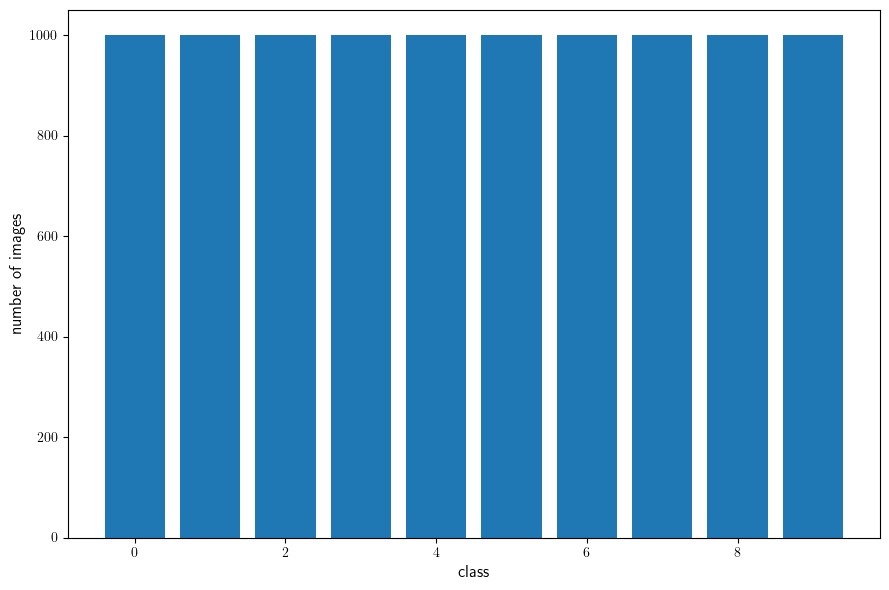

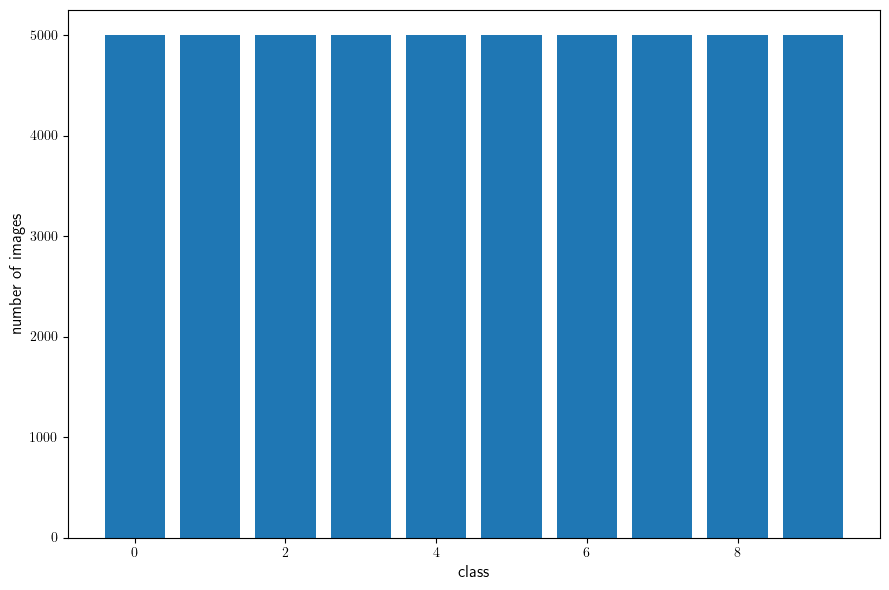

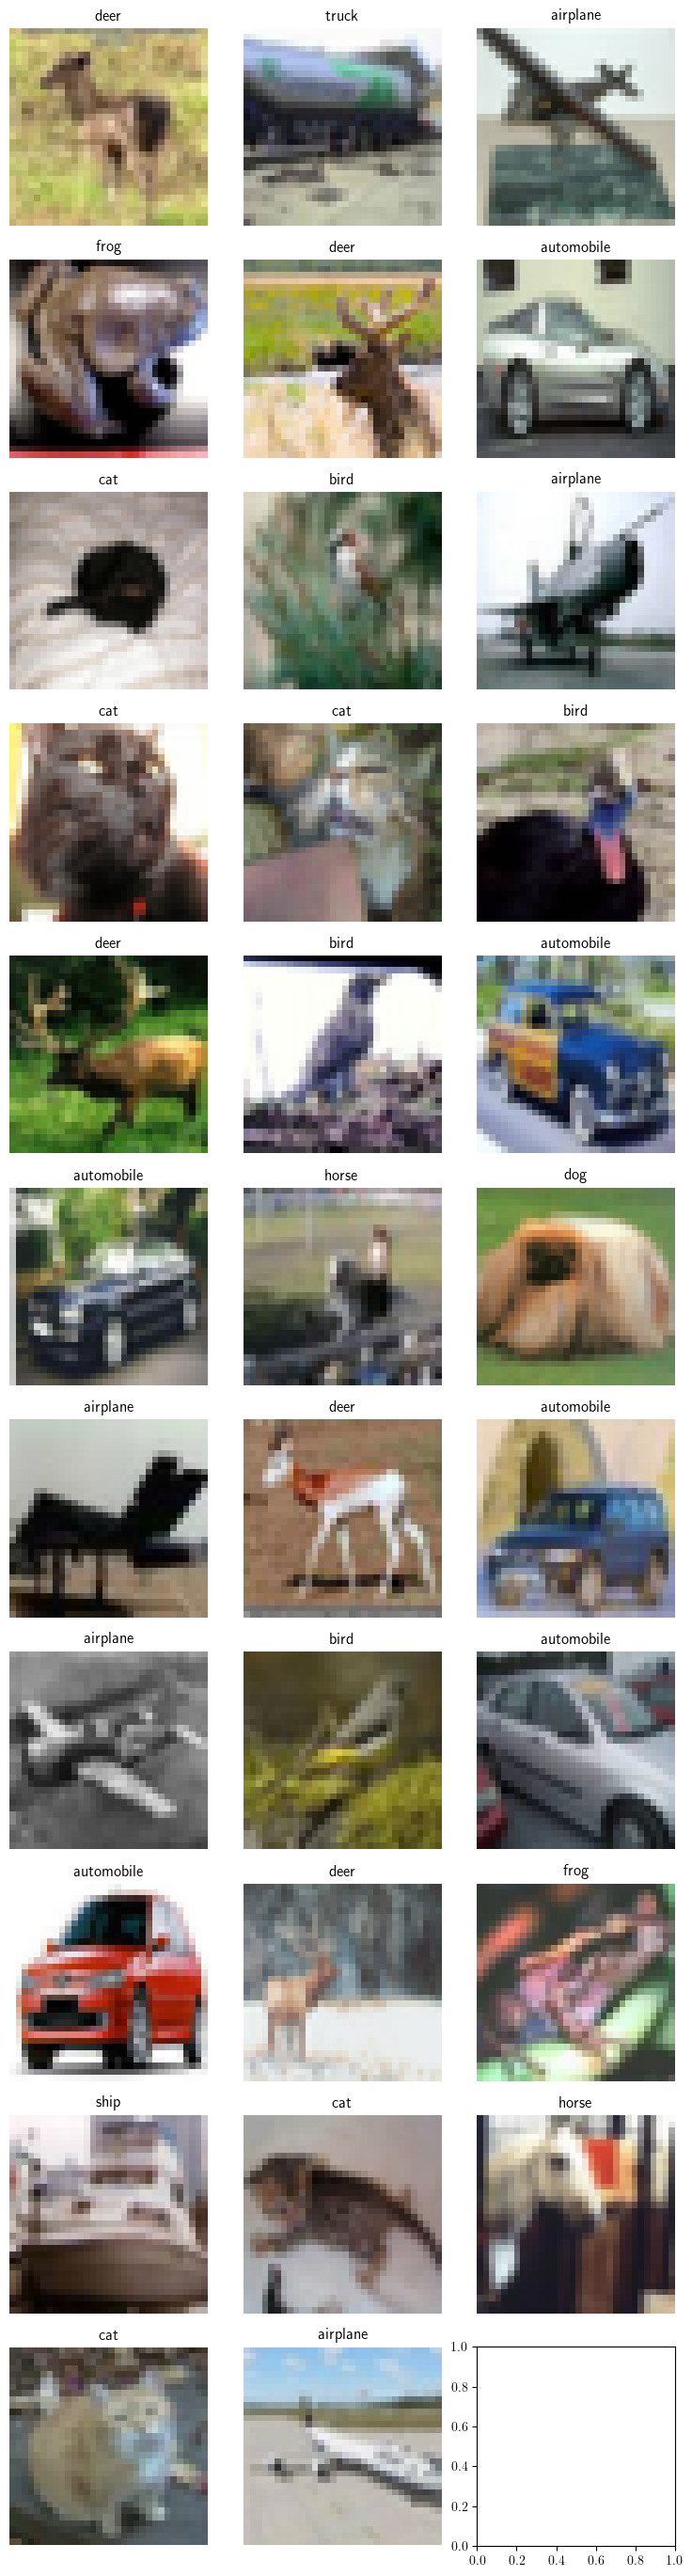

In [7]:
config = get_config()
pytorch_loop = PytorchLoop(config)
shared_modules = pytorch_loop.shared_modules
image_means, image_stds = ad.get_dataset_mean_std(shared_modules['dataset_to_tensor'])
print("image mean color value:")
print(image_means)
print("image color standard deviation:")
print(image_stds)
print('---------------')
print('class distribution for loader_test')
fig1 = ad.plot_class_distributions(shared_modules['loader_test'], filename='')
print('---------------')
print('class distribution for loader_train')
fig2 = ad.plot_class_distributions(shared_modules['loader_train'], filename='')
print('---------------')
print('print some images:')
fig3 = ad.plot_image_batch(shared_modules['loader_test'], batch_index=0, filename='', norm_mean=norm_mean, norm_std=norm_std)